In [86]:
import pandas as pd

In [87]:
X_train = pd.read_csv("C:/Users/Julien GILLES/Documents/ESILV A4 Machine learning Projet/X_train_NHkHMNU.csv")
X_test = pd.read_csv("C:/Users/Julien GILLES/Documents/ESILV A4 Machine learning Projet/X_test_final.csv")
Y_train = pd.read_csv("C:/Users/Julien GILLES/Documents/ESILV A4 Machine learning Projet/y_train_ZAN5mwg.csv")

In [88]:
print(X_train['COUNTRY'])

0       FR
1       FR
2       FR
3       DE
4       FR
        ..
1489    DE
1490    FR
1491    DE
1492    FR
1493    DE
Name: COUNTRY, Length: 1494, dtype: object


In [89]:
X_train = pd.get_dummies(X_train, columns=['COUNTRY']) #one-hot encoding
#création d'une colonne COUNTRY_DE et COUNTRY_FR en encodage binaire

In [90]:
X_test = pd.get_dummies(X_test, columns=['COUNTRY']) #one-hot encoding

In [91]:
X_train = X_train.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
#on remplace les valeurs manquantes par la moyenne de la colonne

In [92]:
X_test = X_test.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

In [93]:
X_train.isnull().sum()

ID                  0
DAY_ID              0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
COUNTRY_DE          0
COUNTRY_FR          0
dtype: int64

In [94]:
#plus de valeurs manquantes

In [95]:
print(X_train['COUNTRY_DE'])

0       False
1       False
2       False
3        True
4       False
        ...  
1489     True
1490    False
1491     True
1492    False
1493     True
Name: COUNTRY_DE, Length: 1494, dtype: bool


In [96]:
X_train.head()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,1054,206,0.210099,-0.427458,-0.606523,0.606523,-0.256332,0.692860,0.256332,-0.692860,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,False,True
1,2049,501,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,False,True
2,1924,687,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,False,True
3,297,720,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,True,False
4,1101,818,0.143807,-0.617038,-0.924990,0.924990,-0.256332,0.990324,0.256332,-0.990324,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,False,True


In [97]:
#vérification de l'équilibrage de notre target pas utile car target pas une classe binaire (pas une tache de classification)

In [98]:
#standardisation des nos datasets
from sklearn.preprocessing import StandardScaler

# Sauvegarder la colonne ID avant de standardiser
X_test_ids = X_test['ID']

# Suppression des colonnes inutiles
X_train = X_train.drop(columns=['ID', 'DAY_ID','COUNTRY_DE','COUNTRY_FR'])
X_test = X_test.drop(columns=['ID', 'DAY_ID','COUNTRY_DE','COUNTRY_FR'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
#analyse de corrélation :

Corrélation avec la variable cible TARGET :
DE_CONSUMPTION     -0.052565
FR_CONSUMPTION     -0.005685
DE_FR_EXCHANGE     -0.020081
FR_DE_EXCHANGE      0.020081
DE_NET_EXPORT      -0.151851
FR_NET_EXPORT      -0.024843
DE_NET_IMPORT       0.151851
FR_NET_IMPORT       0.024843
DE_GAS              0.096657
FR_GAS              0.024652
DE_COAL             0.045181
FR_COAL             0.015732
DE_HYDRO            0.086127
FR_HYDRO            0.052820
DE_NUCLEAR          0.012236
FR_NUCLEAR          0.001588
DE_SOLAR            0.021934
FR_SOLAR            0.021081
DE_WINDPOW         -0.150287
FR_WINDPOW         -0.132523
DE_LIGNITE          0.034433
DE_RESIDUAL_LOAD    0.132555
FR_RESIDUAL_LOAD    0.030254
DE_RAIN            -0.039134
FR_RAIN            -0.039834
DE_WIND            -0.081883
FR_WIND            -0.048876
DE_TEMP            -0.043010
FR_TEMP            -0.045275
GAS_RET             0.041969
COAL_RET           -0.010285
CARBON_RET          0.038252
dtype: float64


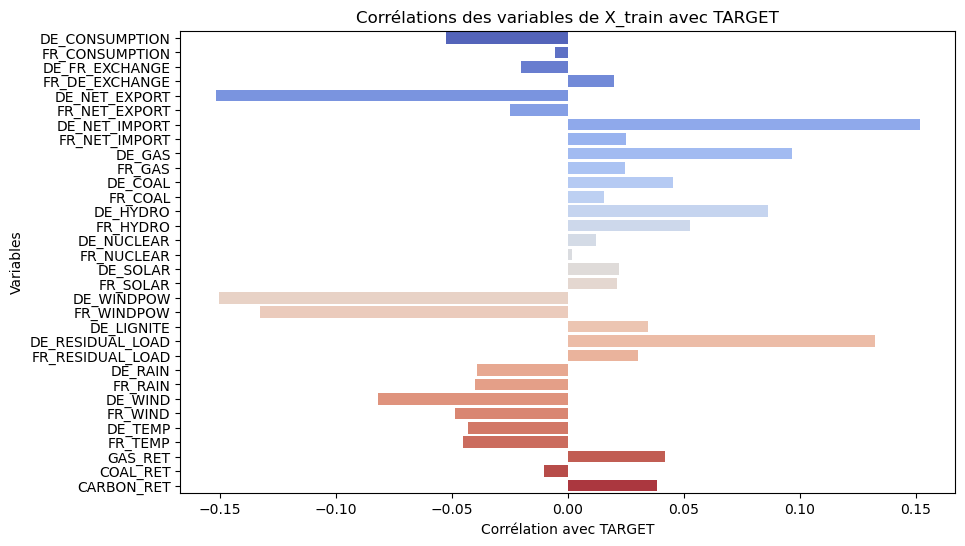

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

target_series = Y_train['TARGET'] if 'TARGET' in Y_train.columns else Y_train.squeeze()

# Corrélation entre chaque variable de X_train et la variable cible Y_train['TARGET']
corr_target = X_train.corrwith(target_series)
print("Corrélation avec la variable cible TARGET :")
print(corr_target)

# Visualisation des corrélations entre chaque variable de X_train et TARGET
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.xlabel('Corrélation avec TARGET')
plt.ylabel('Variables')
plt.title('Corrélations des variables de X_train avec TARGET')
plt.show()


In [79]:
#phase de réduction de dimensionnalité?

In [102]:
# Calcul de la corrélation entre chaque variable de X_train et la cible
corr_target = X_train.corrwith(target_series)

# Filtrer pour obtenir les variables ayant une corrélation absolue > 0,04
selected_features = corr_target[abs(corr_target) > 0.05].index

X_train_selected = X_train[selected_features]

print("Variables ayant une corrélation absolue > 0,05 avec la cible :")
print(X_train_selected.head(3))

Variables ayant une corrélation absolue > 0,05 avec la cible :
   DE_CONSUMPTION  DE_NET_EXPORT  DE_NET_IMPORT    DE_GAS  DE_HYDRO  FR_HYDRO  \
0        0.210099      -0.256332       0.256332  0.441238  2.209047  0.207838   
1       -0.022399      -0.573520       0.573520  0.174773  0.187964 -0.807112   
2        1.395035      -0.622021       0.622021  2.351913 -0.108578  0.779142   

   DE_WINDPOW  FR_WINDPOW  DE_RESIDUAL_LOAD   DE_WIND  
0   -0.573370   -0.269460          0.626666 -0.790823  
1   -0.035514   -0.107350         -0.395469  1.522331  
2   -0.298755   -0.141239          1.336625  0.431134  


Corrélation avec la variable cible TARGET (seuil > 0,05) :
DE_CONSUMPTION     -0.052565
DE_NET_EXPORT      -0.151851
DE_NET_IMPORT       0.151851
DE_GAS              0.096657
DE_HYDRO            0.086127
FR_HYDRO            0.052820
DE_WINDPOW         -0.150287
FR_WINDPOW         -0.132523
DE_RESIDUAL_LOAD    0.132555
DE_WIND            -0.081883
dtype: float64


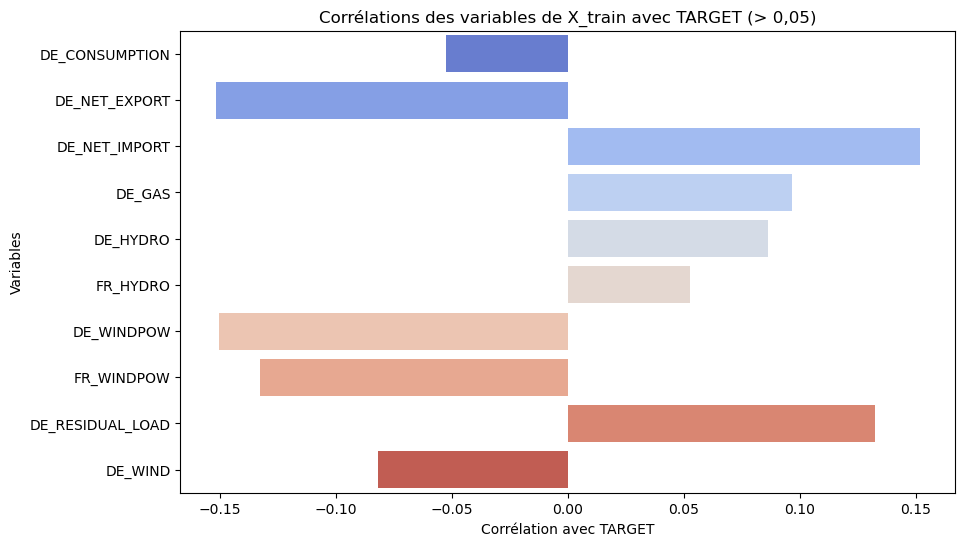

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la corrélation entre chaque variable de X_train et la cible target_series
corr_target = X_train.corrwith(target_series)

# Filtrer pour ne garder que les corrélations > 0,05 (en valeur absolue)
filtered_corr_target = corr_target[abs(corr_target) > 0.05]

print("Corrélation avec la variable cible TARGET (seuil > 0,05) :")
print(filtered_corr_target)

# Visualisation des corrélations avec un seuil > 0,05
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_corr_target.values, y=filtered_corr_target.index, palette='coolwarm')
plt.xlabel('Corrélation avec TARGET')
plt.ylabel('Variables')
plt.title('Corrélations des variables de X_train avec TARGET (> 0,05)')
plt.show()

In [105]:
#on a maintenant la liste des 10 variables les plus corrélées

In [108]:
filtered_corr_target = corr_target[abs(corr_target) > 0.05].index

# Créer un nouveau dataset avec uniquement les variables sélectionnées
X_train_filtered = X_train[filtered_corr_target]

# Affichage pour vérifier le dataset
print("Dataset avec les colonnes ayant une corrélation absolue > 0,05 avec TARGET :")
print(X_train_filtered.head())


Dataset avec les colonnes ayant une corrélation absolue > 0,05 avec TARGET :
   DE_CONSUMPTION  DE_NET_EXPORT  DE_NET_IMPORT    DE_GAS  DE_HYDRO  FR_HYDRO  \
0        0.210099      -0.256332       0.256332  0.441238  2.209047  0.207838   
1       -0.022399      -0.573520       0.573520  0.174773  0.187964 -0.807112   
2        1.395035      -0.622021       0.622021  2.351913 -0.108578  0.779142   
3       -0.983324      -0.270870       0.270870  0.487818 -0.368417  1.320483   
4        0.143807      -0.256332       0.256332  0.238693 -0.230179 -0.795983   

   DE_WINDPOW  FR_WINDPOW  DE_RESIDUAL_LOAD   DE_WIND  
0   -0.573370   -0.269460          0.626666 -0.790823  
1   -0.035514   -0.107350         -0.395469  1.522331  
2   -0.298755   -0.141239          1.336625  0.431134  
3   -0.010090    0.366885         -1.191889 -0.499409  
4   -0.774941   -0.564498          0.571613 -1.088158  


In [ ]:
#on a créé un new dataset avec les 1à variables les plus corrélées à notre target (on va l'utiliser pour entraîner notre modèle)

In [109]:
#ATTENTION : on a appliqué les mêmes modifications au fichier X_test pour pouvoir comparer correctement :
#-encodage de country
#-remplacement des valeurs manquantes par la moyenne
#-phase de standardisation

In [ ]:
#1.test avec Linear_Regression (train_test_split)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

y = Y_train['TARGET']
X_train,X_test, y_train,y_test = train_test_split(X_train_filtered, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train= model.predict(X_train)
print(spearmanr(y_pred_train, y_train).correlation)

0.2425477306774369


In [114]:
#test avec validation croisée sur l'ensemble du jeu de données (avant suppression des colonnes liées à la correlation > 0.05)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_results = cross_val_score(model, X_train_scaled, Y_train['TARGET'], cv=5, scoring='neg_mean_squared_error')

print(f'Mean MSE for each fold: {-cv_results}')  # Les scores sont négatifs car MSE est une perte
print(f'Mean MSE across all folds: {-cv_results.mean()}')

cv_results_r2 = cross_val_score(model, X_train_scaled, Y_train['TARGET'], cv=5, scoring='r2')

print("Scores R2 pour chaque fold:", cv_results_r2)
print("Score moyen R2:", cv_results_r2.mean())

Mean MSE for each fold: [1.32878372 1.17019483 0.8249949  1.14648961 0.86787144]
Mean MSE across all folds: 1.067666899907008
Scores R2 pour chaque fold: [ 0.03261134 -0.00849442  0.01090989 -0.02071004 -0.02573864]
Score moyen R2: -0.0022843743223327495


In [117]:
#test avec validation croisée sur le jeu de données modifié(apès suppression des colonnes liées à la correlation > 0.05)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_results = cross_val_score(model, X_train_filtered, y, cv=5, scoring='neg_mean_squared_error')

print(f'Mean MSE for each fold: {-cv_results}')  # Les scores sont négatifs car MSE est une perte
print(f'Mean MSE across all folds: {-cv_results.mean()}')

cv_results_r2 = cross_val_score(model, X_train_filtered, y, cv=5, scoring='r2')

print("Scores R2 pour chaque fold:", cv_results_r2)
print("Score moyen R2:", cv_results_r2.mean())

Mean MSE for each fold: [1.30297927 1.1654418  0.81213799 1.1400058  0.86677688]
Mean MSE across all folds: 1.0574683466064216
Scores R2 pour chaque fold: [ 0.05139764 -0.00439818  0.0263241  -0.01493755 -0.02444498]
Score moyen R2: 0.0067882065663609215


In [120]:
#test avec Ridge et sur jeu de données modifié (10 colonnes les plus corrélées)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model_ridge = Ridge(alpha=1.0) 

cv_results_mse = cross_val_score(model_ridge, X_train_filtered, y, cv=5, scoring='neg_mean_squared_error')
cv_results_r2 = cross_val_score(model_ridge, X_train_filtered, y, cv=5, scoring='r2')

print(f'Mean MSE: {-cv_results_mse.mean()}')  
print(f'MSE Standard Deviation: {cv_results_mse.std()}')

print(f'Mean R²: {cv_results_r2.mean()}')  # Moyenne de R² sur les folds
print(f'R² Standard Deviation: {cv_results_r2.std()}')  # Écart-type de R² sur les folds



Mean MSE: 1.0573103755684796
MSE Standard Deviation: 0.18719314142498286
Mean R²: 0.006934801624816833
R² Standard Deviation: 0.02798822067809026


In [122]:
#test avec Lasso
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1)  

# Effectuer la validation croisée avec 5 folds et scorer avec MSE
cv_results_mse = cross_val_score(model_lasso, X_train_filtered, y, cv=5, scoring='neg_mean_squared_error')
cv_results_r2 = cross_val_score(model_lasso, X_train_filtered, y, cv=5, scoring='r2')

# Afficher les résultats de la validation croisée
print(f'Mean MSE: {-cv_results_mse.mean()}')  # Notez que MSE est renvoyé comme négatif dans scikit-learn
print(f'MSE Standard Deviation: {cv_results_mse.std()}')

print(f'Mean R²: {cv_results_r2.mean()}')  # Moyenne de R² sur les folds
print(f'R² Standard Deviation: {cv_results_r2.std()}')  # Écart-type de R² sur les folds


Mean MSE: 1.0608452436591962
MSE Standard Deviation: 0.20415363738323264
Mean R²: 0.006400145854685557
R² Standard Deviation: 0.006864959549068136
